In [103]:
import matplotlib.pyplot as plt 
import numpy as np

In [240]:
x = np.arange(2022,2091)
years = np.arange(0,len(x))

#
# START USER EDITABLE SECTION
#

# INCOME PARAMETERS:
retire_year = 30   # How many years until retirement
year_salary_begin = 0 # years until salary job begins 
year_max = 20    # Years until maximum income reached
initial_salary = 100000   # Consider putting your after-tax salary here
max_salary = 250000
post_retire_working = 1    # How many years after retirement you'll make partial income
post_retire_salary = 50000    #How much you'll make after retirement (can be 0)
investment_rate = 40/100    # Percent of income post expenses you'll invest
current_savings = 50000

# HOME PARAMETERS:
year_of_purchase = 1    # How many years until you purchase your home
annual_mortgage_expenses = 20400
annual_home_expenses = 7000 + 1000 + 3400   # (tax, insurance, expenses)
down_payment = 50000
loan_length = 30
intrest_rate = 3.0   # Varies by mortgage length & credit score
year_of_car_purchase = 5
price_of_car = 40000

# INVESTMENT PARAMETERS
init_ira = 20000
init_brok = 30000
annual_ira = 6000 # Annual IRA contribution
invest_after = 5000  # Annual brokerage contribution after retirement (can be 0)
years_after_investing = 5  # number of years you'll continue investing after retirement

# RENT PARAMETERS
year_rent_start = 1
year_rent_end = 6   # Last year you will be paying rent (inclusive)
annual_rent = 0 

#
# END USER EDITABLE SECTION
#


# INCOME MODEL ------------------------------------------------------------------------
a = (max_salary-initial_salary) / ((year_max-year_salary_begin)**2)  # Auto calculated weight for steady exponential growth to max
income = initial_salary + a*years**2 # + raise rates
income[income>max_salary] = max_salary    # Enforce maximum values
income[year_max:(retire_year+1)] = max_salary   # sustain max income
income[(retire_year + 1)::] = 0       # Default to 0 income
income[(retire_year+1):(retire_year+1+post_retire_working)] = post_retire_salary   # Can be used for a "soft" retire
# Anamoulous situations / known years
income[0]    =  current_savings # Set this to 
#income[1]   = 103000
#income[2:7] = 36000    # Grad School Salary


# EXPENSE MODEL   --------------------------------------------------------------------
rent = np.zeros(len(years))  # Leave these parameters at 0 for no rent
rent[(year_rent_start):(year_rent_end+1)] = annual_rent    # Annual rent payments

base_annual_expenses = np.zeros(len(years))
base_annual_expenses[1:7] = 3000    # Budget expenses (not housing or transportation) - includes cost of phone and computer
base_annual_expenses[7::] = 20000   # Annual living expenses (not housing or transportation) according to studies

transportation = np.zeros(len(years))
transportation[1:7] = 750  # annual transportation expenses
transportation[7::] = 6000
transportation[year_of_car_purchase] = transportation[year_of_car_purchase] + price_of_car   # Cost of car outright

medical = np.zeros(len(years))
medical[1:43] = 1200
medical[43::] = 6500 # Cost based off emperical data

# ASSESTS
home = np.zeros(len(years))
home[year_of_purchase:(year_of_purchase + loan_length)] = annual_mortgage_expenses # mortgage
home[year_of_purchase::] = home[year_of_purchase::] +  annual_home_expenses
home[year_of_purchase] = home[year_of_purchase] + down_payment    # down payment

expenses = rent + base_annual_expenses + transportation + medical + home     # make sure expenses aren't subtracted fro IRA




# INVESTMENT MODEL --------------------------------------------------------------------
investment = list()

IRA = np.zeros(len(years))
IRA[0] = init_ira

Brokerage = np.zeros(len(years))
Brokerage[0] = init_brok

average_return = 7.5 / 100    # VTSAX average annual return since inception    --- includes inflation

# IRA contribution yearly
IRA_contriubtion = np.zeros(len(years))
IRA_contriubtion[1:(retire_year+1)] = annual_ira

# Brokerage investment as % of yearly income - expenses
Brokerage_investment = np.zeros(len(years))
for i in range(0,(retire_year+1)):
    if (income[i] - expenses[i]) > 0:
        Brokerage_investment[i] = (income[i] - expenses[i]) * investment_rate  # Investing half of available cash
    else:
        Brokerage_investment[i] = 0
Brokerage_investment[(retire_year+1):(retire_year+1+years_after_investing)] = invest_after             # invest $5000 for 5 years after I retire
Brokerage_investment[0:(year_salary_begin)] = 0

for i in range(len(years)):
    if i == 0:
        investment.append( IRA[0] + Brokerage[0] )
    else:
        IRA[i] = ( (IRA[i-1] + IRA[i-1]*average_return) + IRA_contriubtion[i])
        Brokerage[i] = ( (Brokerage[i-1] + Brokerage[i-1]*average_return) + Brokerage_investment[i])
        investment.append(Brokerage[i] + IRA[i])
            

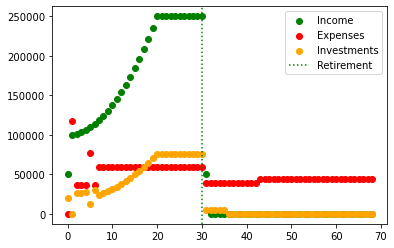

In [241]:
# Income, expenses, and investments over time
l1 = plt.scatter(years,income,color="green")
l2 = plt.scatter(years,expenses,color="red")
l3 = plt.scatter(years,Brokerage_investment,color="orange")
l4 = plt.axvline(x=retire_year,color = "green", linestyle = ":")
plt.ticklabel_format(style="plain")
plt.legend((l1,l2,l3,l4),("Income","Expenses","Investments","Retirement"))
plt.show()

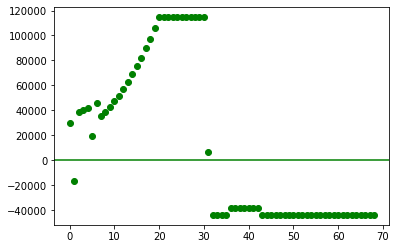

Income vs expenses


In [242]:
# Annual income vs expenses
plt.scatter(years,income-expenses-Brokerage_investment,color = "green")
plt.axhline(y=0, color = "green")
plt.show()
print("Income vs expenses")

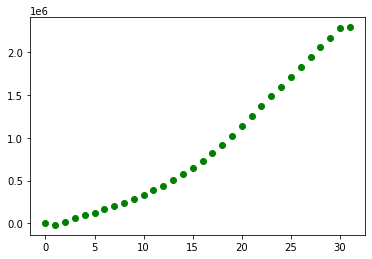

Avilable Cash
2022:    0
2023:    -16775
2024:    22075
2025:    62050
2026:    103600
2027:    123175
2028:    169225
2029:    204850
2030:    243850
2031:    286675
2032:    333775
2033:    385600
2034:    442600
2035:    505225
2036:    573925
2037:    649150
2038:    731350
2039:    820975
2040:    918475
2041:    1024300
2042:    1138900
2043:    1253500
2044:    1368100
2045:    1482700
2046:    1597300
2047:    1711900
2048:    1826500
2049:    1941100
2050:    2055700
2051:    2170300
2052:    2284900


In [243]:
# Available Cash balance:
available_cash = np.zeros(len(years))
for i in range(1,len(years)):
    available_cash[i] = available_cash[i-1] + income[i]-expenses[i]-Brokerage_investment[i]
    
plt.scatter(years[0:(retire_year+2)], available_cash[0:(retire_year+2)], color = "green")
plt.show()
print("Avilable Cash")
for i in range(len(available_cash[0:(retire_year+1)])):
    print(str(int(x[i]))+":    "+str(round(float(available_cash[i]))))

In [239]:
# Net Wealth qualifies as raw savings, investments, and paid home value
net = income + investment - expenses - IRA_contriubtion - Brokerage_investment + home - ((home + annual_home_expenses) * (intrest_rate/100))
print("Projected net wealth by year:")
for i in range(len(x)):
    print(str(int(x[i]))+":    "+str(round(float(net[i]))))

Projected net wealth by year:
2022:    79658
2023:    135129
2024:    158919
2025:    199384
2026:    244102
2027:    253640
2028:    331485
2029:    369075
2030:    426076
2031:    489831
2032:    561081
2033:    640619
2034:    729295
2035:    828015
2036:    937752
2037:    1059545
2038:    1194508
2039:    1343829
2040:    1508783
2041:    1690732
2042:    1891136
2043:    2096178
2044:    2315573
2045:    2550326
2046:    2801511
2047:    3070280
2048:    3357862
2049:    3665575
2050:    3994828
2051:    4347129
2052:    4724091
2053:    4928052
2054:    5226817
2055:    5599996
2056:    5999298
2057:    6426551
2058:    6883711
2059:    7367523
2060:    7885201
2061:    8439117
2062:    9031807
2063:    9665986
2064:    10344557
2065:    11065327
2066:    11842223
2067:    12673502
2068:    13562970
2069:    14514700
2070:    15533052
2071:    16622689
2072:    17788600
2073:    19036125
2074:    20370976
2075:    21799268
2076:    23327539
2077:    24962790
2078:    26712508
20

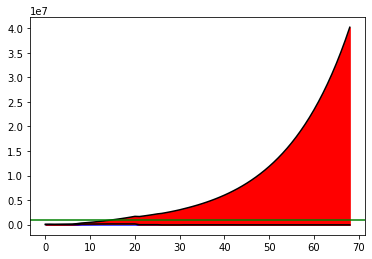

In [229]:
# Where does the money come from?
adj_income = income - expenses
adj_investment = adj_income + investment

plt.plot(years,adj_income,color="black")
plt.plot(years,adj_investment,color="black")
plt.fill_between(years,adj_income,0,color='blue')
plt.fill_between(years,adj_income,adj_investment,color='red')
plt.axhline(y=1000000,color = "green")

plt.show()

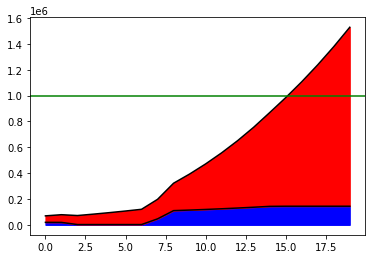

In [230]:
# Where does the money come from? - first 20 years

plt.plot(years[0:20],adj_income[0:20],color="black")
plt.plot(years[0:20],adj_investment[0:20],color="black")
plt.fill_between(years[0:20],adj_income[0:20],0,color='blue')
plt.fill_between(years[0:20],adj_income[0:20],adj_investment[0:20],color='red')
plt.axhline(y=1000000,color = "green")

plt.show()